# 생선 길이로 무게 예측

- 회귀(regression)
    - 임의의 어떤 숫자를 예측하는 문제
    - 변수들 사이의 상관관계를 분석하는 방법
    
- KNN회귀
    1. 분류와 똑같이 예측하려는 샘플에 가장 가까운 샘플 k개를 선택
    2. k개의 샘플의 종속변수 값의 평균을 구함

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# 데이터 준비

In [6]:
df = pd.read_csv("./data/Fish.csv")

In [7]:
# 농어 데이터만 사용
df = df.loc[df["Species"] == "Perch", ["Species", "Length2", "Weight"]]

In [8]:
df.head()

,Species,Length2,Weight
72,Perch,8.4,5.9
73,Perch,13.7,32.0
74,Perch,15.0,40.0
75,Perch,16.2,51.5
76,Perch,17.4,70.0


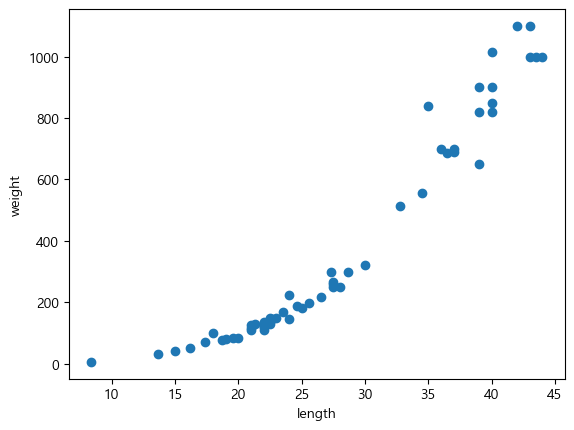

In [9]:
plt.figure()

plt.scatter(df["Length2"], df["Weight"])

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

- 길이가 커짐에 따라 무게가 증가하는 경향이 있음

In [10]:
x_train, x_test, y_train, y_test = train_test_split(df["Length2"], df["Weight"], test_size = 0.25, random_state = 1)

In [11]:
# 독립변수는 2차원 배열이어야 함
x_train  # 시리즈 형태

82     21.0
75     16.2
96     24.0
124    43.0
107    28.7
98     24.6
117    39.0
126    43.5
99     25.0
106    28.0
85     21.3
94     23.0
119    40.0
102    27.3
89     22.0
123    42.0
103    27.5
95     23.5
76     17.4
86     22.0
101    26.5
100    25.6
122    40.0
112    36.5
90     22.0
127    44.0
92     22.5
97     24.0
78     18.7
79     19.0
125    43.0
73     13.7
88     22.0
72      8.4
87     22.0
77     18.0
83     21.0
81     20.0
80     19.6
84     21.0
115    37.0
109    32.8
Name: Length2, dtype: float64

In [12]:
x_train = np.reshape(x_train.values, (-1, 1))

In [13]:
x_train

array([[21. ],
       [16.2],
       [24. ],
       [43. ],
       [28.7],
       [24.6],
       [39. ],
       [43.5],
       [25. ],
       [28. ],
       [21.3],
       [23. ],
       [40. ],
       [27.3],
       [22. ],
       [42. ],
       [27.5],
       [23.5],
       [17.4],
       [22. ],
       [26.5],
       [25.6],
       [40. ],
       [36.5],
       [22. ],
       [44. ],
       [22.5],
       [24. ],
       [18.7],
       [19. ],
       [43. ],
       [13.7],
       [22. ],
       [ 8.4],
       [22. ],
       [18. ],
       [21. ],
       [20. ],
       [19.6],
       [21. ],
       [37. ],
       [32.8]])

In [14]:
x_test = np.reshape(x_test.values, (-1, 1))

# 모델 훈련

In [16]:
knr = KNeighborsRegressor(n_neighbors = 5)

In [17]:
knr.fit(x_train, y_train)

KNeighborsRegressor()

# 모델 평가

- 결정계수
    - 계산식
        - 1 - ((sum((타깃 - 예측)^2)) / (sum((타깃 - 타깃평균)^2)))
    - 모델의 설명력을 뜻함
    - 1에 가까울수록 모델 성능이 좋다

In [18]:
knr.score(x_test, y_test)

0.9364645895704451

- mean_absolute_error
    - 타깃과 예측의 절댓값 오차를 평균하여 반환

In [19]:
# 테스트 세트에 대한 예측
pred = knr.predict(x_test)

In [20]:
pred_df = pd.DataFrame({"ans" : y_test, "pred" : pred})
pred_df.head()

,ans,pred
116,900.0,739.0
74,40.0,66.3
118,820.0,739.0
91,130.0,133.0
104,265.0,265.6


In [21]:
# 테스트 세트에 대한 평균 절댓값 오차를 계산
mae = mean_absolute_error(y_test, pred)
mae

57.32142857142858

<img src = "./image/KNN_VS_LINEAR.png">

In [22]:
max(x_train)

array([44.])

In [23]:
knr.predict([[50]])

array([1040.])

In [24]:
knr.predict([[60]])

array([1040.])

In [25]:
knr.predict([[70]])

array([1040.])

In [26]:
max(y_train)

1100.0

In [27]:
# 50cm 농어의 이웃 찾기
dist, idx = knr.kneighbors([[50]])

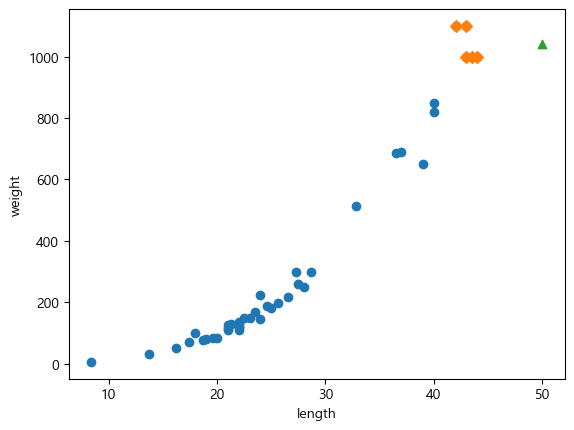

In [28]:
plt.figure()

plt.scatter(x_train, y_train)
plt.scatter(x_train[idx], y_train.iloc[idx.flatten()], marker = "D")
plt.scatter(50, 1040, marker = "^")

plt.xlabel("length")
plt.ylabel("weight")
plt.show()